In [102]:
#Seteamos directorio y el archivo csv con el que vamos a trabajar
directorio = r"C:\Users\Santiago\Desktop\2024\1er cuatri\Big Data\Big data - TP2"

archivo_csv = "Base Airbnb NY.csv"

#Descargo librerías
import os

import pandas as pd

#Contruyo la ruta absoluta

ruta_absoluta = os.path.join(directorio, archivo_csv)

#Cargo el csv como un data frame

data_frame = pd.read_csv(ruta_absoluta)


In [170]:
#1.a) Para reconocer cuantos elementos duplicados hay, vemos la longitud del dataframe antes y despues de eliminar duplicados.longitud_antes_de_borrar = len(data_frame)

print(longitud_antes_de_borrar)

#Elimino los duplicados. Para eso creo una nuevo archivo que se llama data_frame_sin_duplicados y pido quedarme con los valores que aparecen por primera vez

data_frame_sin_duplicados = data_frame.drop_duplicates(keep='first')

longitud_sin_duplicados = len(data_frame_sin_duplicados)

print(longitud_sin_duplicados)

#Resto las longitudes para saber cuantos datos duplicados habia:

longitud_antes_de_borrar - longitud_sin_duplicados


48905
48895


10

In [116]:
#1)b)
#Eliminamos columnas que no tienen información relevante
#Con el siguiente comando vemos que columnas tiene:
print(data_frame.head())
print(data_frame.columns)
columnas_a_eliminar = ['host_name', 'name']  
data_frame = data_frame.drop(columns=columnas_a_eliminar)
#Decidimos eliminar estas dos variables ya que no aportan información relevante para Big Data

     id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0               1                  9  2018-10-19   
1  Entire home/apt  225.0               1                 45  2019-05-21   
2     Private room  150.0               3                  0         NaN   
3  Entire home/apt   89.0               1                270  2019-07-05   
4  Entire home/apt   80.0              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.

KeyError: "['host_name', 'name'] not found in axis"

In [111]:
#1)e) 
# Suponiendo que 'df' es tu DataFrame y 'variable_categorica' es la columna con las categorías
frecuencia_valores_roomt = data_frame['room_type'].value_counts()
print("Frecuencia de cada valor único:")
print(frecuencia_valores_roomt)
print(data_frame)

# Suponiendo que 'df' es tu DataFrame y 'variable_categorica' es la columna con las categorías
frecuencia_valores = data_frame['neighbourhood_group'].value_counts()
print("Frecuencia de cada valor único:")
print(frecuencia_valores)

# Crear un diccionario de mapeo para 'neighbourhood_group'
neighbourhood_group_mapping = {'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Staten Island': 4, 'Bronx': 5}

# Crear un diccionario de mapeo para 'room_type'
room_type_mapping = {'Entire home/apt': 1, 'Private room': 2, 'Shared room': 3}

# Asignar valores numéricos a las columnas correspondientes
data_frame['neighbourhood_group_numeric'] = data_frame['neighbourhood_group'].map(neighbourhood_group_mapping)
data_frame['room_type_numeric'] = data_frame['room_type'].map(room_type_mapping)

# Mostrar las primeras filas del DataFrame con las nuevas variables numéricas
print(data_frame.head())

#Primero, buscamos la cantidad de barrios y de tipos de cuarto que habian. Despues pedimos que le asignen un valor numérico a cada categoría y así tenemos nuestras variables transformadas a numéricas.

Frecuencia de cada valor único:
room_type
Entire home/apt    25414
Private room       22331
Shared room         1160
Name: count, dtype: int64
             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48900  19454344  Perfect ap in Manhattan! Walking to Central Park!  11670284   
48901  36224876                   Upper East Side Apt By The Water  46232598   
48902  21869051                        Comfy Apt in NYC Brownstone  97243693   
48903   3004563                                          

In [164]:
#1)f). Usar groupby para contar el número de oferentes por 'Neighbourhood group'
offer_group = data_frame.groupby('neighbourhood_group').size().reset_index(name='offer_group')

# Unir el resultado de vuelta al DataFrame original
data_frame = data_frame.merge(offer_group, on='neighbourhood_group', how='left')

# Mostrar las primeras filas del DataFrame con la nueva columna 'offer_group'
print(data_frame.head())

     id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0               1                  9  2018-10-19   
1  Entire home/apt  225.0               1                 45  2019-05-21   
2     Private room  150.0               3                  0         NaN   
3  Entire home/apt   89.0               1                270  2019-07-05   
4  Entire home/apt   80.0              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.

In [165]:
print(data_frame.columns)


Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_numeric', 'room_type_numeric', 'offer_group_x',
       'offer_group_y', 'offer_group'],
      dtype='object')


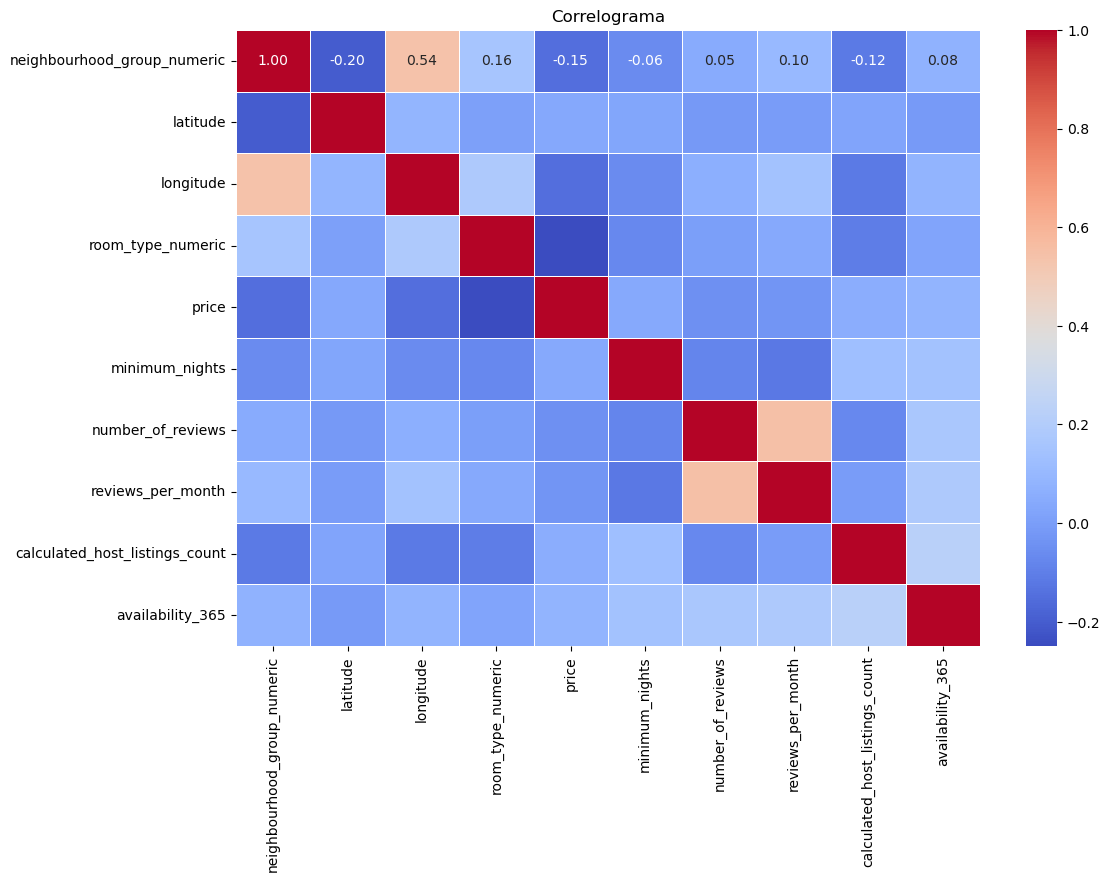

In [166]:
#2)a) 

import seaborn as sns
import matplotlib.pyplot as plt

#Elegimos las variables para las que vamos a armar la matriz de correlación
variables_para_correlograma = ['neighbourhood_group_numeric', 'latitude', 'longitude', 'room_type_numeric', 'price', 
             'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
             'calculated_host_listings_count', 'availability_365']

#Creamos un subconjunto
subconjunto_data_frame = data_frame[variables_para_correlograma]

# Calcular la matriz de correlación
correlograma = subconjunto_data_frame.corr()

#Pedimos imprimir la matriz:
plt.figure(figsize=(12, 8))
sns.heatmap(correlograma, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlograma')
plt.show()

In [167]:
#Podemos ver que las variables más correlacionadas son el número de reviews en total con el número de reviews por mes. Esto es lógico ya que la que tenga más reviews cada mes tendra más reviews en total. 

In [168]:
# Calculamos la proporción de oferentes por "Neighbourhood group" y por "Room type"
proporcion_por_barrio = data_frame['neighbourhood_group'].value_counts(normalize=True)

proporcion_por_tipo_habitacion = data_frame['room_type'].value_counts(normalize=True)

#Imprimimos la proporción de oferentes por "Neighbourhood group" y por "Room type"
print("Proporción de oferentes por 'Neighbourhood group':")
print(proporcion_por_barrio)
print()

print("Proporción de oferentes por tipo de habitación:")
print(proporcion_por_tipo_habitacion)




Proporción de oferentes por 'Neighbourhood group':
neighbourhood_group
Manhattan        0.443063
Brooklyn         0.411144
Queens           0.115857
Bronx            0.022309
Staten Island    0.007627
Name: proportion, dtype: float64

Proporción de oferentes por tipo de habitación:
room_type
Entire home/apt    0.519661
Private room       0.456620
Shared room        0.023719
Name: proportion, dtype: float64


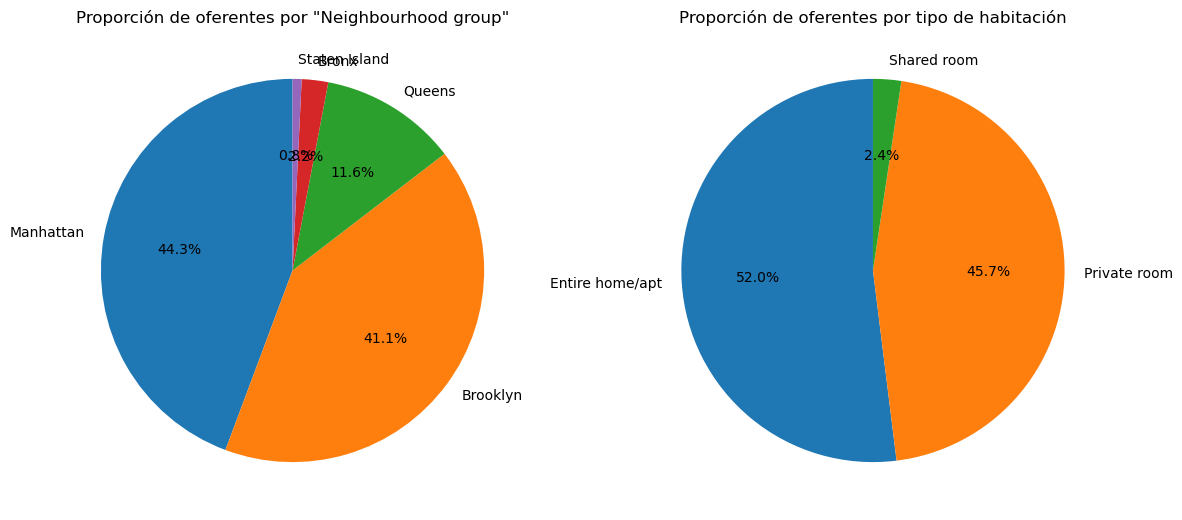

In [171]:
import matplotlib.pyplot as plt

# Calculamos la proporción de oferentes por "Neighbourhood group" y por "tipo de habitación"
proporcion_por_barrio = data_frame['neighbourhood_group'].value_counts(normalize=True)

proporcion_por_tipo_habitacion = data_frame['room_type'].value_counts(normalize=True)

# Creamos gráficos que muestran las proporciones
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de la proporción de oferentes por "Neighbourhood group":
axs[0].pie(proporcion_por_barrio, labels=proporcion_por_barrio.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Proporción de oferentes por "Neighbourhood group"')

# Gráfico de la proporción de oferentes por "tipo de habitación":
axs[1].pie(proporcion_por_tipo_habitacion, labels=proporcion_por_tipo_habitacion.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Proporción de oferentes por tipo de habitación')

#Pedimos que muestren los gráficos:
plt.tight_layout()
plt.show()


In [ ]:
#Encontramos que los barrios en los que más oferta hay son Brooklyn y Manhattan, con más del 40%
#Por otro lado, encontramos que casi no se ofrecen cuartos compartidos pero que si es bastante común ofrecer departamentos compartidos con cuartos separados.

C:\Users\Santiago\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


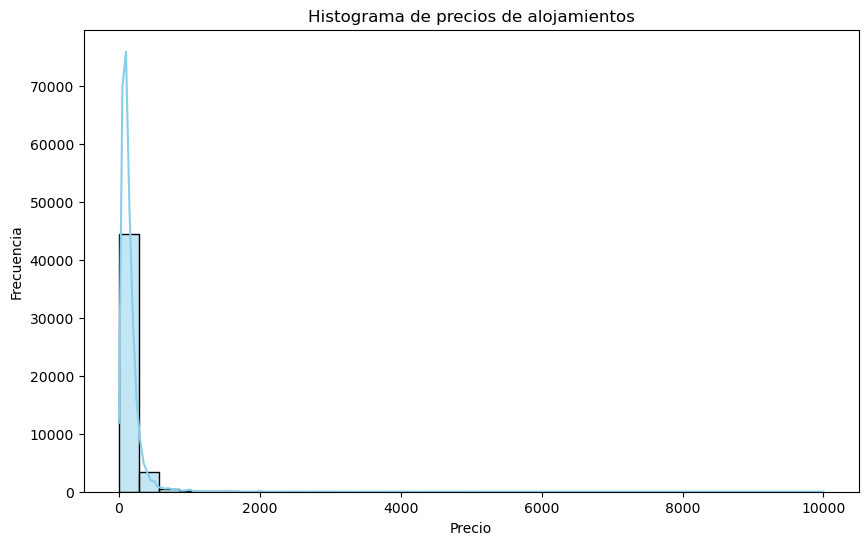

Precio mínimo: 0.0
Precio máximo: 10000.0
Precio promedio: 152.72503579464103

Media de precio por 'Neighbourhood group':
neighbourhood_group
Bronx             87.464646
Brooklyn         124.380597
Manhattan        196.862352
Queens            99.536900
Staten Island    114.812332
Name: price, dtype: float64

Media de precio por tipo de habitación:
room_type
Entire home/apt    211.788107
Private room        89.783388
Shared room         70.127586
Name: price, dtype: float64


In [172]:
#2.3) 
import seaborn as sns

# Pedimos que se arme un histograma de los precios de los alojamientos y pedimos que calcule el precio mínimo, máximo y promedio
plt.figure(figsize=(10, 6))
sns.histplot(data_frame['price'], bins=35, kde=True, color='skyblue')
plt.title('Histograma de precios de alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()
precio_minimo = data_frame['price'].min()
precio_maximo = data_frame['price'].max()
precio_promedio = data_frame['price'].mean()

# Calcular la media de precio por "Neighbourhood group" y por "Tipo de habitación":
media_precio_por_barrio = data_frame.groupby('neighbourhood_group')['price'].mean()

media_precio_por_tipo_habitacion = data_frame.groupby('room_type')['price'].mean()

# Imprimimos los resultados
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")
print(f"Precio promedio: {precio_promedio}")
print("\nMedia de precio por 'Neighbourhood group':")
print(media_precio_por_barrio)
print("\nMedia de precio por tipo de habitación:")
print(media_precio_por_tipo_habitacion)


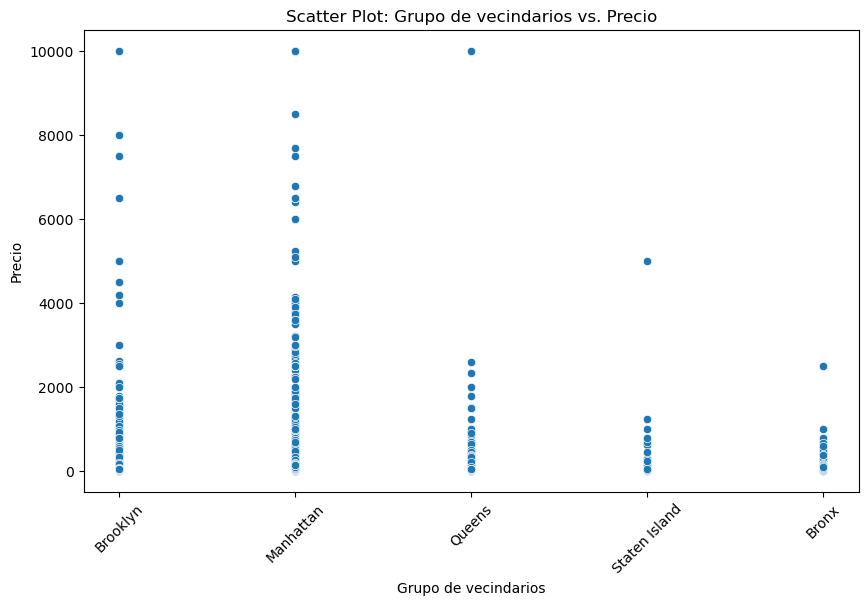

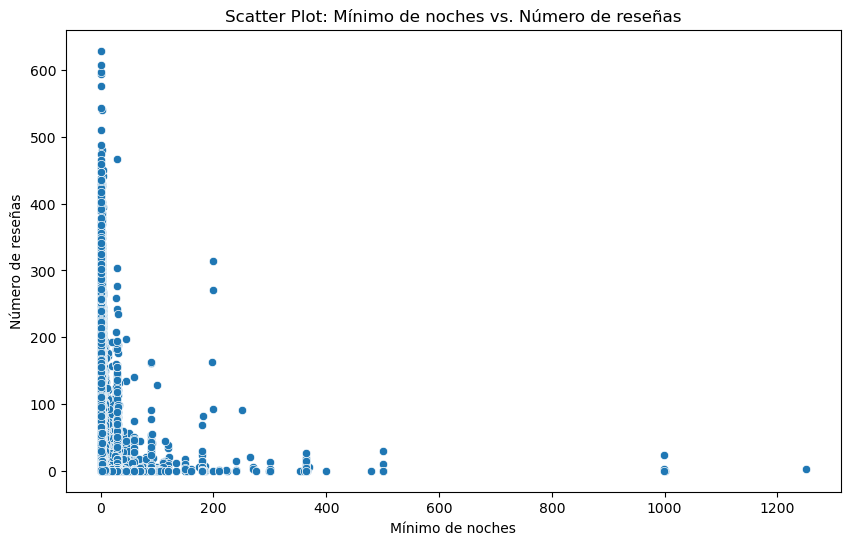

In [160]:
#2.4) 
#Scatter plot N1: Neighbourhood group vs Price

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='neighbourhood_group', y='price', data=data_frame)
plt.xlabel('Grupo de vecindarios')
plt.ylabel('Precio')
plt.title('Scatter Plot: Grupo de vecindarios vs. Precio')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

#Podemos ver que tanto Brooklyn como Manhattan son los que tienen más observaciones y los que tienen más observaciones con precios más altos. El Bronx tiene menos observaciones y con el precio más bajo.

#Scatter plot N1: Neighbourhood group vs Price

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='number_of_reviews', data=data_frame)
plt.xlabel('Mínimo de noches')
plt.ylabel('Número de reseñas')
plt.title('Scatter Plot: Mínimo de noches vs. Número de reseñas')
plt.show()

#Podemos ver que los que tienen más un número de noches mínimas mayor tienen menos reviews. Esto puede ser porque hay menos personas que alquilan por muhcas noches que las que alquilan por pocas ya que es comoún usar Airbnb para vacaciones.



In [173]:
#2.5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionamos las variables para el análisis de componentes principales
variables = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Subconjunto de datos con las características seleccionadas
subset_data = data_frame[variables]

# Normalizamos los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Aplicamos PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Pedimos la varianza explicada por los componentes principales
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por los dos componentes principales:", explained_variance_ratio.sum())

# Graficamos los datos en dos dimensiones
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análisis de Componentes Principales (PCA)')
plt.grid(True)
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values